# Project Outline :

- We will work on Insurance Charges Forecast based on the data which contains, smoking, chidren, age, sex, BMI
- We will try to work n Regression techniques and get an output with high R2 Score


In [14]:
#lets import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
ins = pd.read_csv('Data/insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.shape

(1338, 7)

In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have 3 columns as objects, let us find what are the different values in each column

In [6]:
ins.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
ins.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
ins.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

For Sex and Region, we have almost equal data in different categories. And for smoker, we have lot of non smokers than smokers. Let us do Label encoding for all these columns.

In [9]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visualizing Data

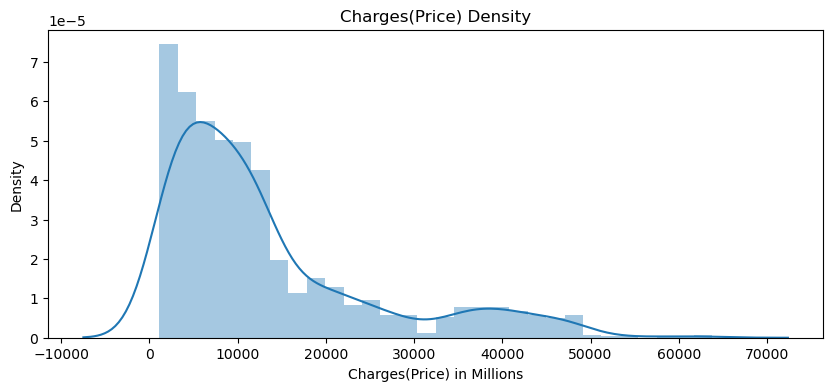

In [17]:
# checking for skewness of target variable = Charges

plt.figure(figsize = (10,4))
charge_dist = sns.distplot(ins.charges)
charge_dist.set(xlabel="Charges(Price) in Millions", title="Charges(Price) Density")
plt.show()

We can observe there is right skewness in the target variable. let us apply log transformation and see it

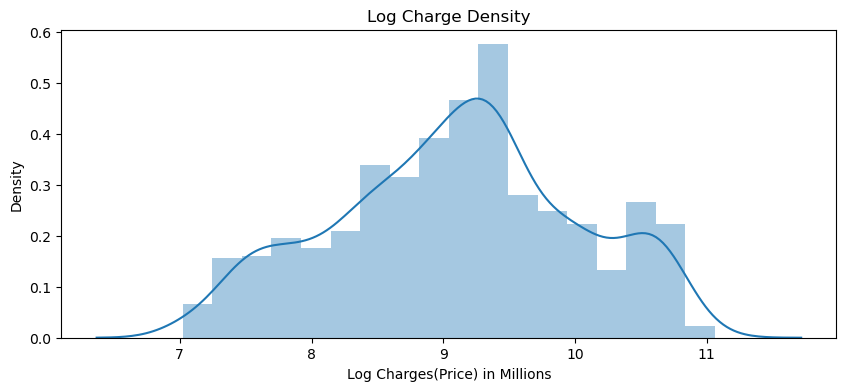

In [19]:
plt.figure(figsize=(10,4))

logged_charge_dist = sns.distplot(np.log(ins["charges"]))
logged_charge_dist.set(xlabel="Log Charges(Price) in Millions", title="Log Charge Density")
plt.show()

Here we can observe a closely matched Normal Distribution, let us this in further Anlaysis.

### Let us visualise Numerical data types

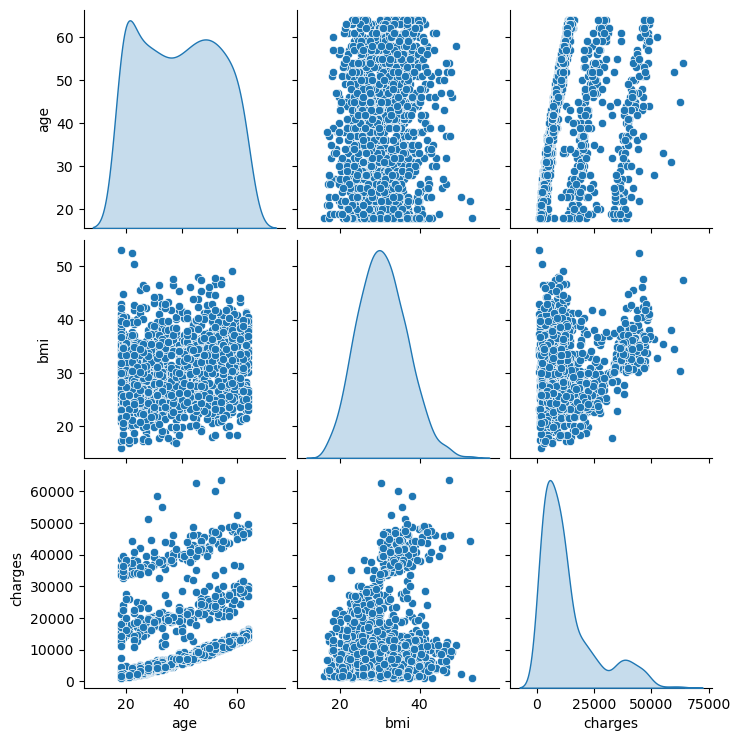

In [20]:
# Pairplot for Age, BMI, Charges
ins_num = ins[['age','bmi','charges']]
sns.pairplot(ins_num, diag_kind = 'kde')
plt.show()

The pairplot reveals that there is a linear relationship between age, bmi with charges

### Let us check for Categorical Variables

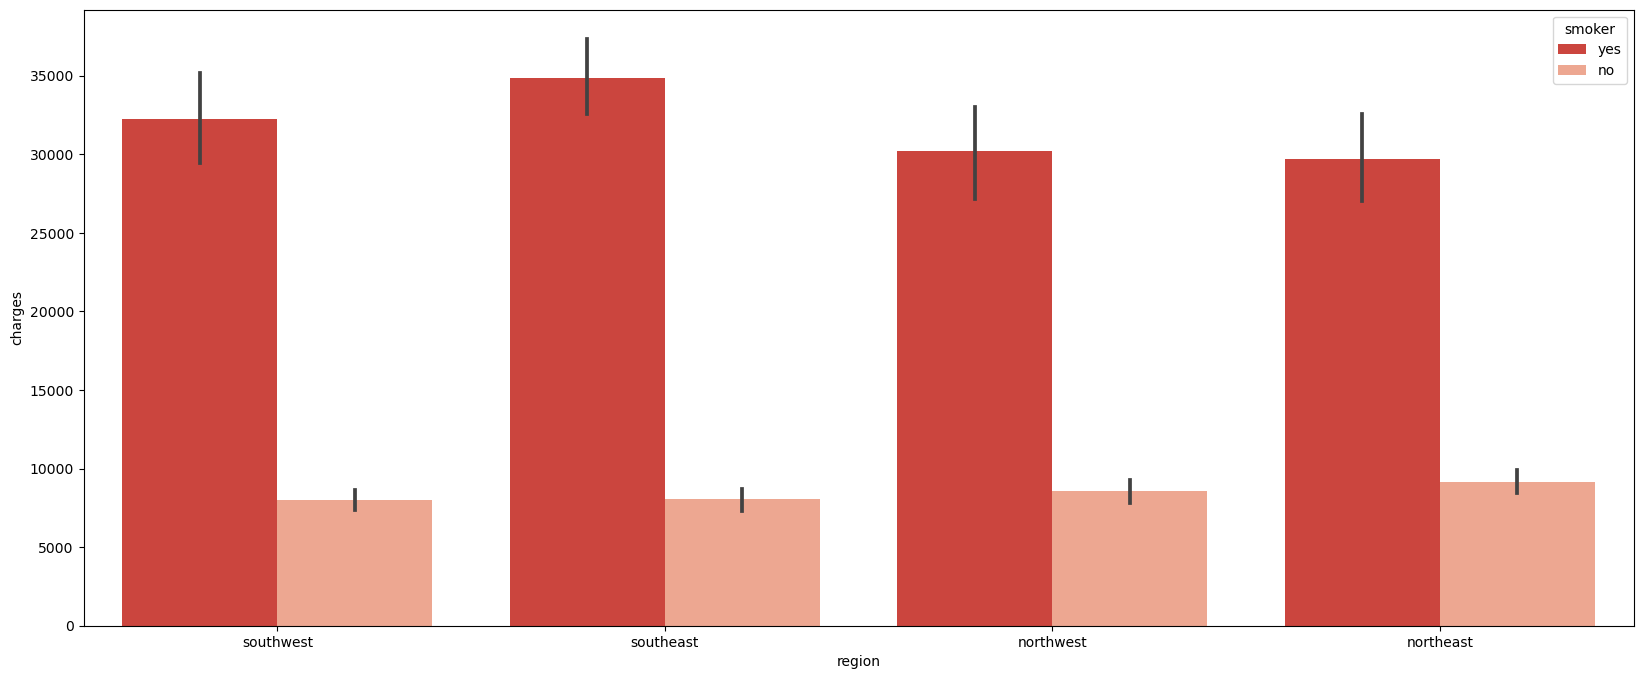

In [21]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = ins, palette = 'Reds_r')

### Charges by age, bmi, and children based on smoking behavior

From these bar charts, we can see that smoking behavior by region significantly affected medical charges. So, let's see the correlation between non-categorical variables (age, bmi, and children) with medical charges (evaluated based on smoking behavior).

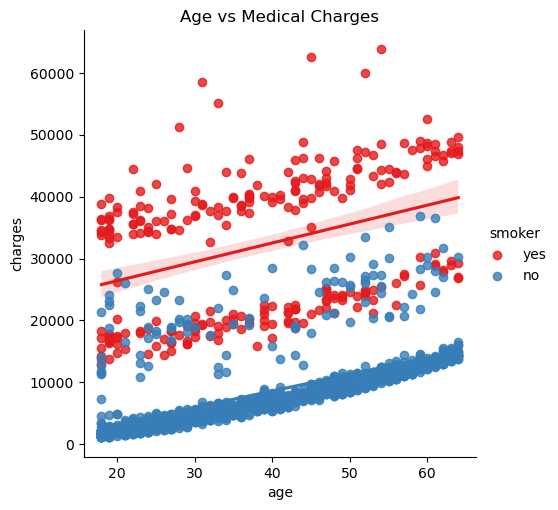

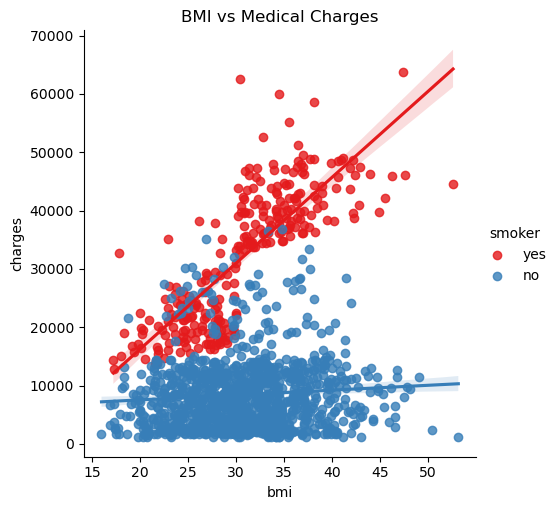

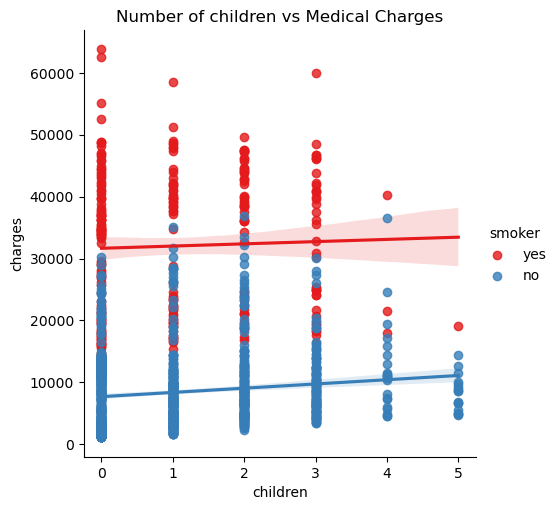

In [22]:
ax = sns.lmplot(x = 'age', y = 'charges', data = ins, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = ins, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = ins, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

plt.show()

Based on the analysis,

- We know that smoking has a great impact on medical costs.
- Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.

### Analysis

In [23]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(ins.region.drop_duplicates())
ins.region = label.transform(ins.region)

label.fit(ins.sex.drop_duplicates())
ins.sex = label.transform(ins.sex)

label.fit(ins.smoker.drop_duplicates())
ins.smoker = label.transform(ins.smoker)

ins.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

Text(0.5, 1.0, 'Correlation Factors Heat Map')

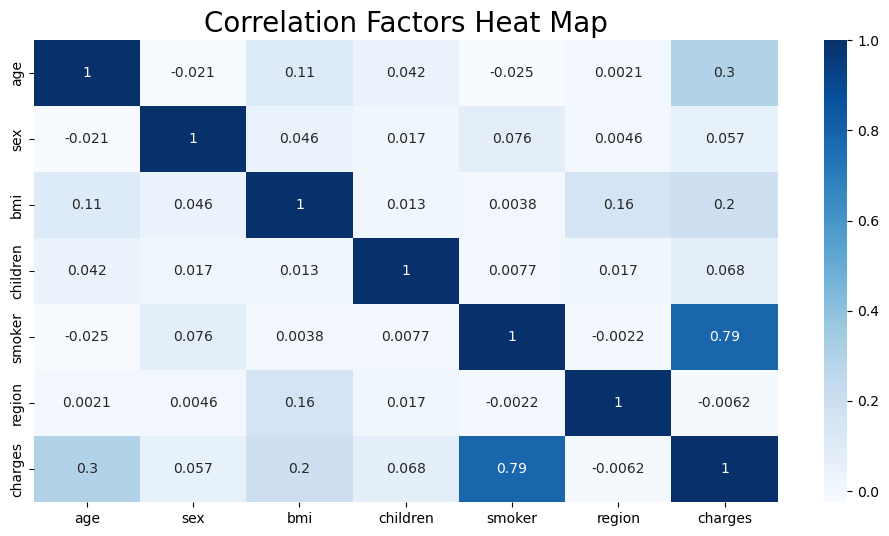

In [26]:
#let us find the correlation between variables

plt.figure(figsize=(12,6))
sns.heatmap(ins.corr(), annot = True, cmap = 'Blues').set_title('Correlation Factors Heat Map', size = '20')


This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.

In [27]:
#let us rank all the variables in correlation with charges
corr = ins.corr().abs()
features = []
correlations = []
for idx, correlation in corr['charges'].T.iteritems():
    if correlation >= .0 and idx != 'charges':
        features.append(idx)
        correlations.append(correlation)
corr_charges_df = pd.DataFrame(
    {'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [28]:
print('Correlations with Charges')
display(corr_charges_df)

Correlations with Charges


,Correlations,Features
4,0.787251,smoker
0,0.299008,age
2,0.198341,bmi
3,0.067998,children
1,0.057292,sex
5,0.006208,region


### Linear Regression

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
features = ins.drop(['charges'], axis = 1)
targets = ins['charges']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)

In [32]:
X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)

Intercept: -11661.983908824413
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [37]:
from sklearn.metrics import r2_score, mean_squared_error

y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

# Mean squared error
y_train_mse = mean_squared_error(y_train, y_train_pred)
y_test_mse = mean_squared_error(y_test, y_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(y_train_mse, y_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(y_train_mse)), 
    np.sqrt(np.absolute(y_test_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_pred)))

# Model Score
print('Model Score:', lr.score(X_test, y_test))

MSE train data: 3.77e+07, 
MSE test data: 3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 5.64e+03

R2 train data: 0.737, 
R2 test data: 0.8

Model Score: 0.7998747145449959


The model score we achieved generates a relatively good prediction; however, we can improve the model by potentially disregarding umimportant independent variables.

# Random Forest Aggressor

In [38]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(X_train, y_train)

X_train_predic = RFR.predict(X_train)
X_test_predic = RFR.predict(X_test)

# Mean squared error
train_mse = metrics.mean_squared_error(X_train_predic, y_train)
test_mse = metrics.mean_squared_error(X_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(X_train_predic, y_train),metrics.r2_score(X_test_predic, y_test)))

# Model Score
print('Model Accuracy Score:', (RFR.score(X_test, y_test))*100)

Mean Squared Error train data: 3778409.061
Mean Squared Error test data: 20561948.169

RMSE train data: 1.94e+03, 
RMSE test data: 1.94e+03

R2 train data: 0.971
R2 test data: 0.861

Model Accuracy Score: 87.0785187973657


The generated model score is an improvement from the previous model!

### Variables Selection based on Correlation ranking from above
Based on the feature importances, we can see that the sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual. Therefore, we can eliminate those variables and generate another model to predict the insurance cost without accounting for those variables. We are only choosing 2 lowest contributing variables to eliminate because it would not be accurate to remove too many potentially unimportant independent variables when generating a model.

### Polynomial Regression

Prepare data again by eliminating unimportant variables and splitting the data into training and testing data.

In [39]:
from sklearn.preprocessing import PolynomialFeatures

features = ins.drop(['charges','sex','region'], axis = 1)
target = ins.charges

pol = PolynomialFeatures (degree = 2)
X_pol = pol.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_pol, target, test_size = 0.2, random_state = 0)

In [40]:
Pol_reg = LinearRegression()
Pol_reg.fit(X_train, y_train)

y_train_predic = Pol_reg.predict(X_train)
y_test_predic = Pol_reg.predict(X_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(X_test, y_test))*100)

Intercept: -5325.8817052522045
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Accuracy Score: 88.12595703345231


# Conclusion :-

Based on the perfomed machine learning algorithms, it seems that the Polynomial Regression after eliminating two unimportant independent variables produces the most accurate method and will be used to predict the insurance cost for an individual.

1. Polynomial Regression: 88%
2. Random Forest Regressor: 87%
3. Linear Regression: 80%